In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies_df = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
rating_df=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [3]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [4]:
rating_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [5]:
df = pd.merge(rating_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [6]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [7]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [8]:
print(movie_ratingCount['totalRatingCount'].describe())

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: totalRatingCount, dtype: float64


In [9]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [10]:
rating_popular_movie.shape

(41362, 5)

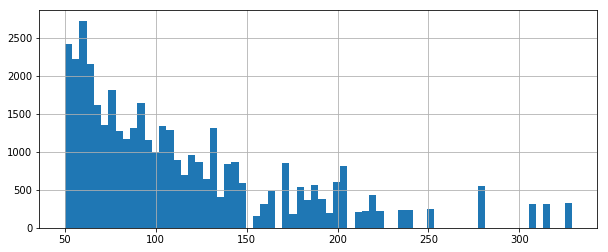

In [11]:
plt.figure(figsize=(10,4))
rating_popular_movie['totalRatingCount'].hist(bins=70)

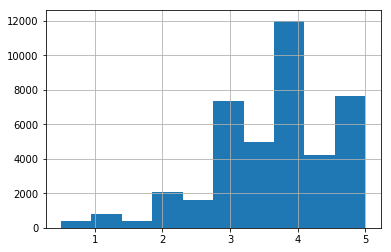

In [12]:
rating_popular_movie['rating'].hist()

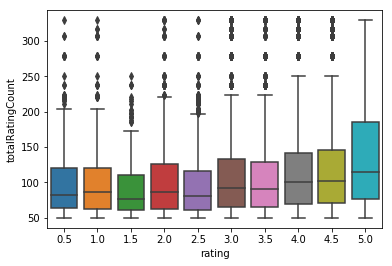

In [24]:
sns.boxplot(x='rating',y='totalRatingCount',data=rating_popular_movie)

In [14]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(np.round(rating_popular_movie['rating'].mean()))
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
12 Angry Men (1957),4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2001: A Space Odyssey (1968),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.5
28 Days Later (2002),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,5.0
300 (2007),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0


In [15]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [16]:
movie_features_df.shape

(450, 606)

In [17]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

285


In [18]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0
12 Angry Men (1957),4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2001: A Space Odyssey (1968),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,5.0,4.0,4.0,5.0,4.0,3.0,4.0,4.5
28 Days Later (2002),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,5.0
300 (2007),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,...,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0


In [19]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for My Cousin Vinny (1992):

1: Romancing the Stone (1984), with distance of 0.004740715026855469:
2: In the Line of Fire (1993), with distance of 0.005102276802062988:
3: Untouchables, The (1987), with distance of 0.005325436592102051:
4: Dave (1993), with distance of 0.005345284938812256:
5: Italian Job, The (2003), with distance of 0.005484819412231445:
